# Gerar dados artificiais

gera 5 classes

In [8]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2500, n_features=4, n_classes=5, n_informative=4,
                          n_redundant=0, class_sep=1, random_state=25)

mask = (y == 0) | (y == 1)
X[mask, 0] = X[mask, 0] * 0.7 + X[mask, 0].mean() * 0.3
X[mask, 1] = X[mask, 1] * 0.7 + X[mask, 1].mean() * 0.3
X_plot = X[:, :2]

X = X_plot


OVO Primal e Dual para 3 classes das coroas

In [1]:
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=2500, n_features=2, n_classes=3, random_state=32)
X

array([[ 0.64690513, -0.11740358],
       [-0.5844759 , -0.45109348],
       [-0.51459268, -0.51529445],
       ...,
       [-0.34593349, -0.50873681],
       [-0.01284879,  1.2585482 ],
       [-0.27585595,  0.24428112]])

gera 3 a 5 classes tipo pizza

In [ ]:
# fazer primal ecoc e ovo 3 e 5 classes (ecoc mais dificulade no primal)
# 200 pontos por classe com 3 classes
# ruido_angular = [.4, .4, .2, .2, .2], delta_angulos = [.45, -.45, +0.2, 0, -.1]
from gerar_pizzas import gerar_classes_pizza
X, y = gerar_classes_pizza(n_pontos_por_classe=200, ruido_angular = [.4, .4, .2, .2, .2], delta_angulos = [.45, -.45, +0.2, 0, -.1])
mask = (y == 0) | (y == 1)
X[mask, 0] = X[mask, 0] * 0.7 + X[mask, 0].mean() * 0.3
X[mask, 1] = X[mask, 1] * 0.7 + X[mask, 1].mean() * 0.3
X_plot = X[:, :2]
X = X_plot
X

array([[ 2.49706256,  0.64606561],
       [ 2.03400296,  0.79791537],
       [ 2.85545894,  0.42992193],
       ...,
       [-0.70498397, -2.77859774],
       [-0.16358783, -2.96991077],
       [ 1.05185279, -4.376762  ]])

# Normalizar dados

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std
print(f'Tamanho do conjunto de treino: {x_train.shape}')
print(f'Tamanho do conjunto de teste: {x_test.shape}')

Tamanho do conjunto de treino: (800, 2)
Tamanho do conjunto de teste: (200, 2)


# Chamar classificador (ECOC primal, kernel=1, MGB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.58
Acurácia de teste: 0.59


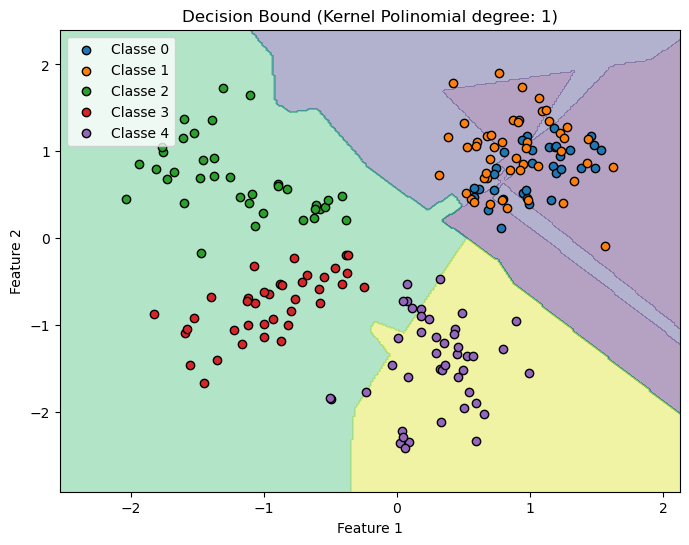

In [27]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=None, kernel=1, step=0.005, mode='primal', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

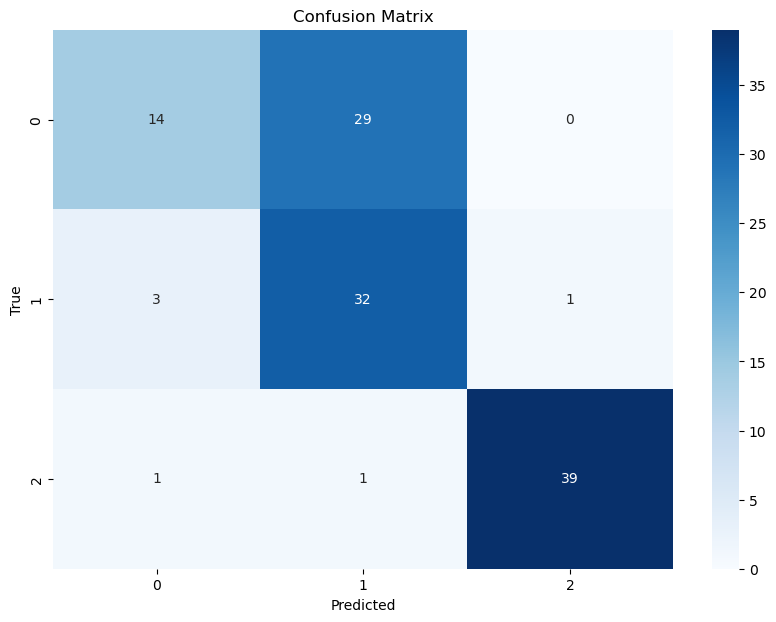

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC primal, kernel=1, MGmB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.79
Acurácia de teste: 0.72


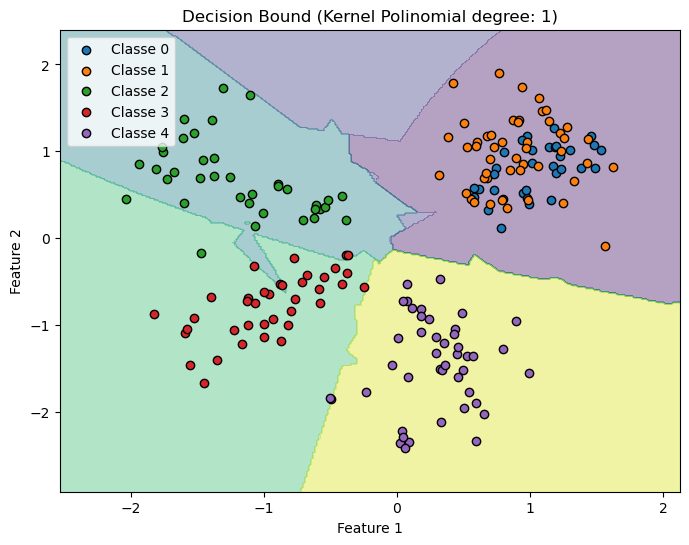

In [28]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=64, kernel=1, step=0.005, mode='primal', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

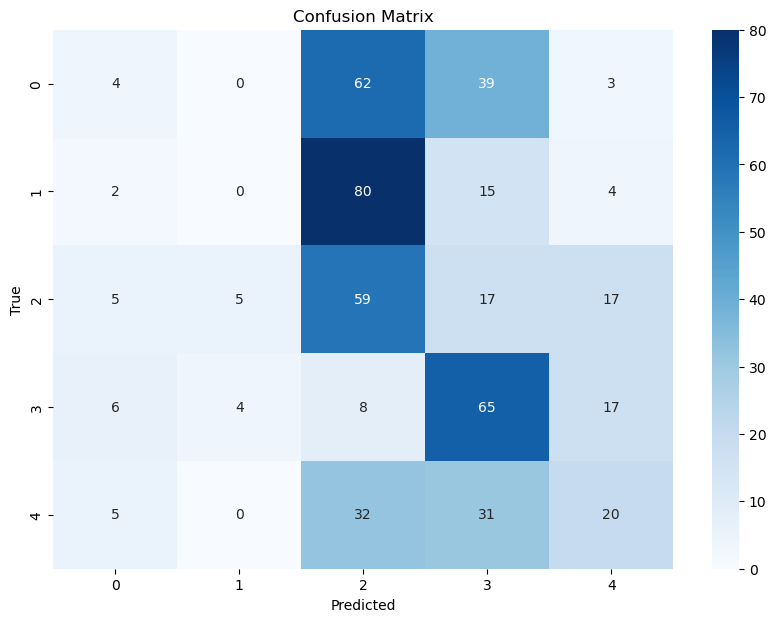

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC primal, kernel=1, MGE)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.75
Acurácia de teste: 0.70


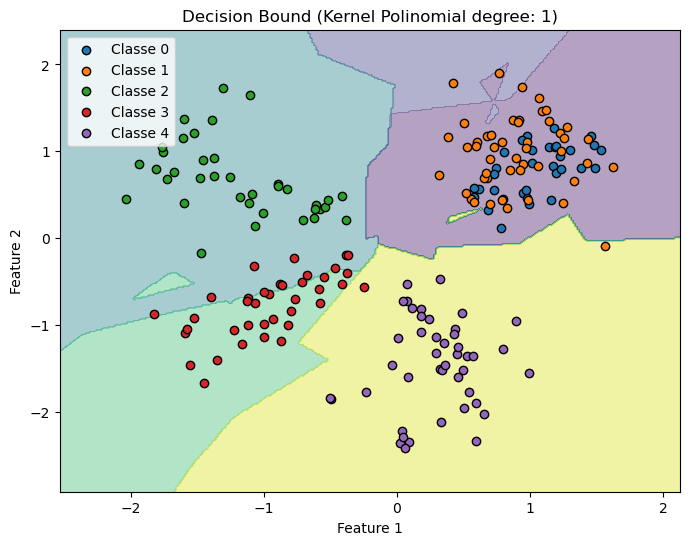

In [29]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=1, kernel=1, step=0.005, mode='primal', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de Confusão

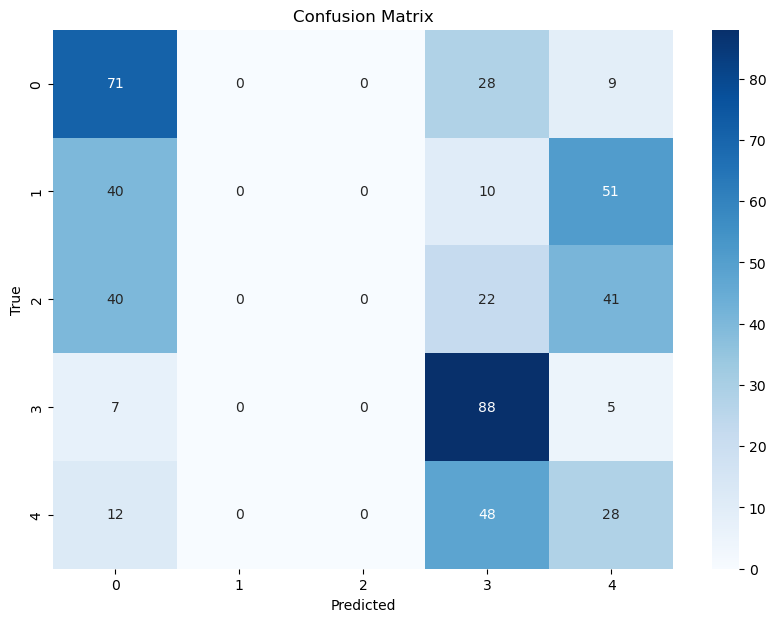

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC primal, kernel=2, MGB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.81
Acurácia de teste: 0.77


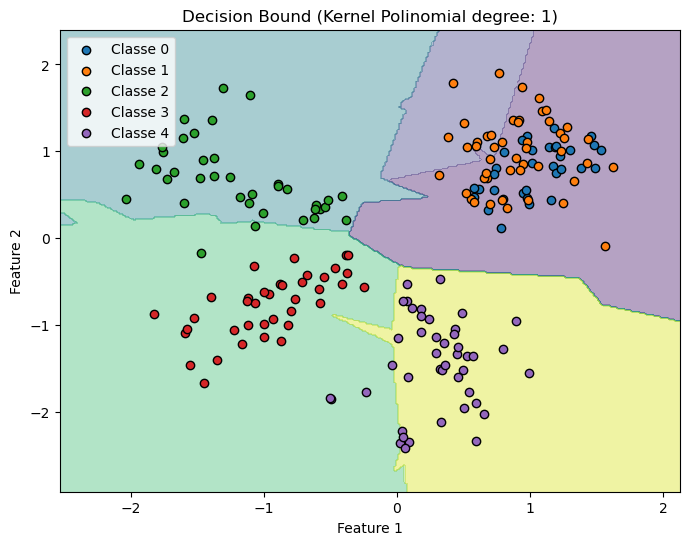

In [30]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=None, kernel=2, step=0.005, mode='primal', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC primal, kernel=2, MGmB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.62
Acurácia de teste: 0.59


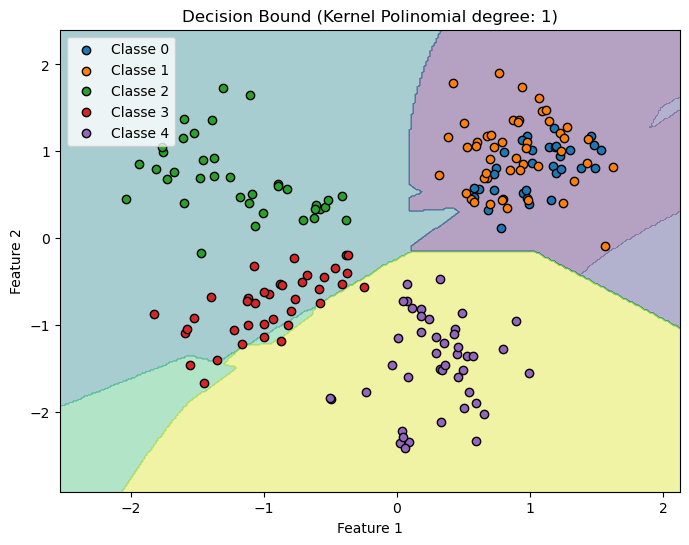

In [31]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=64, kernel=2, step=0.005, mode='primal', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de Confusão

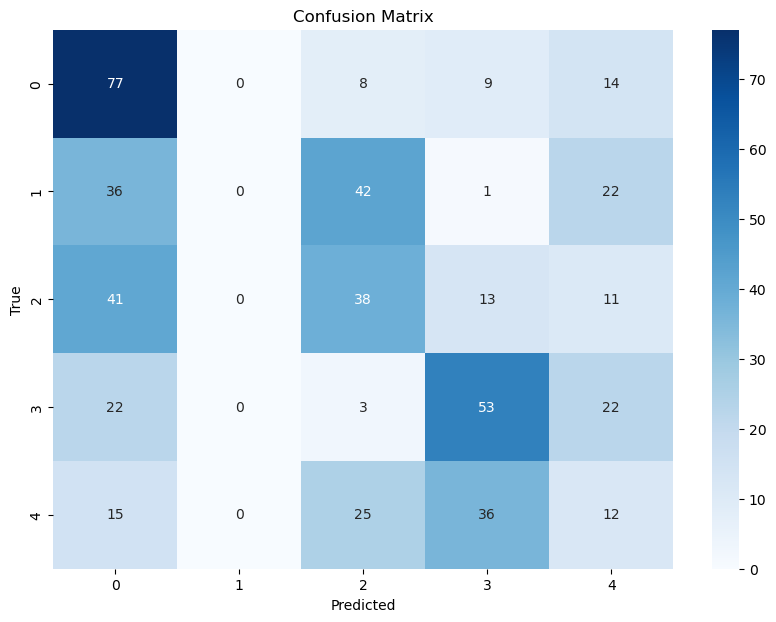

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC primal, kernel=2, MGE)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.68
Acurácia de teste: 0.67


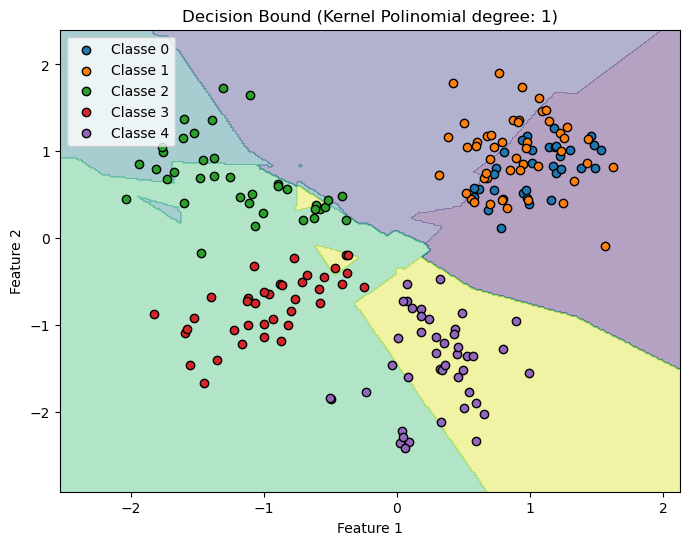

In [32]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=1, kernel=2, step=0.005, mode='primal', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

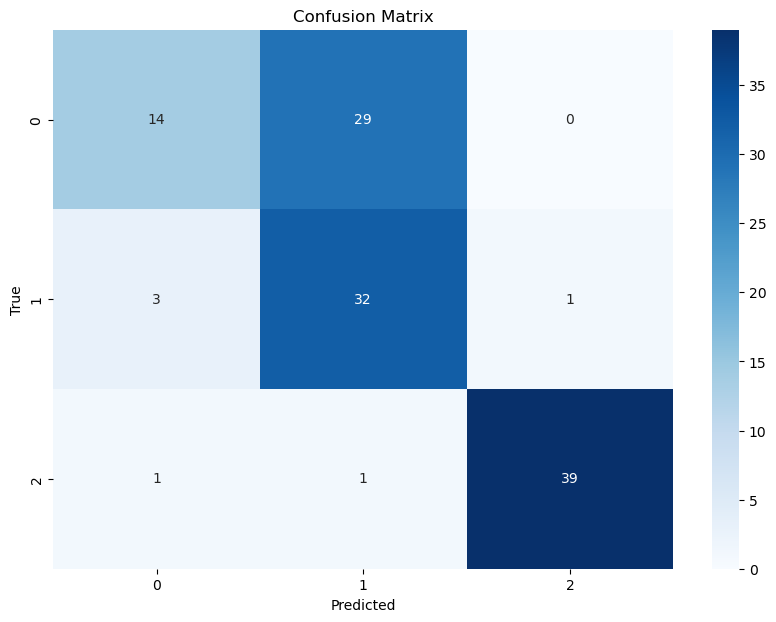

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC dual, kernel=1, MGB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.32
Acurácia de teste: 0.34


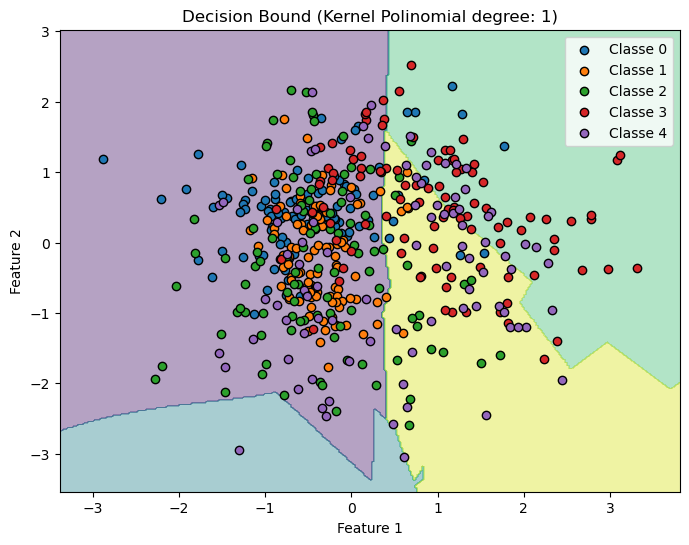

In [16]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=None, kernel=1, step=0.005, mode='dual', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

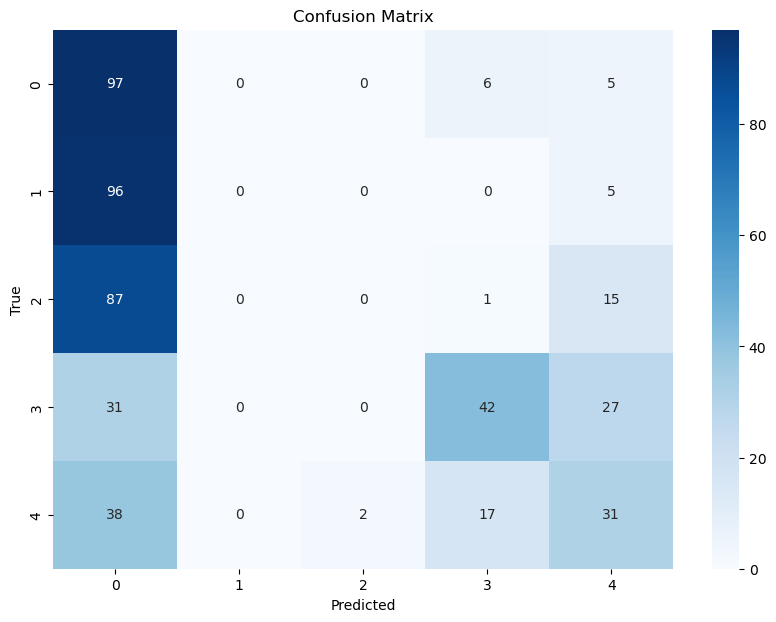

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC dual, kernel=1, MGmB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.37
Acurácia de teste: 0.40


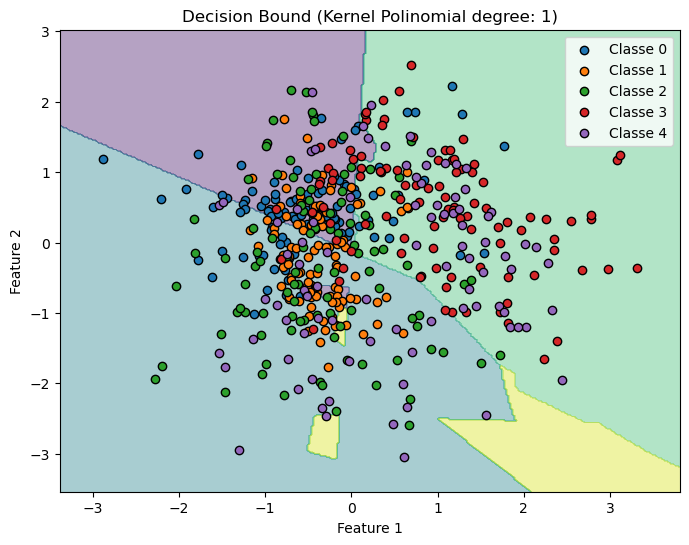

In [18]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=64, kernel=1, step=0.005, mode='dual', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

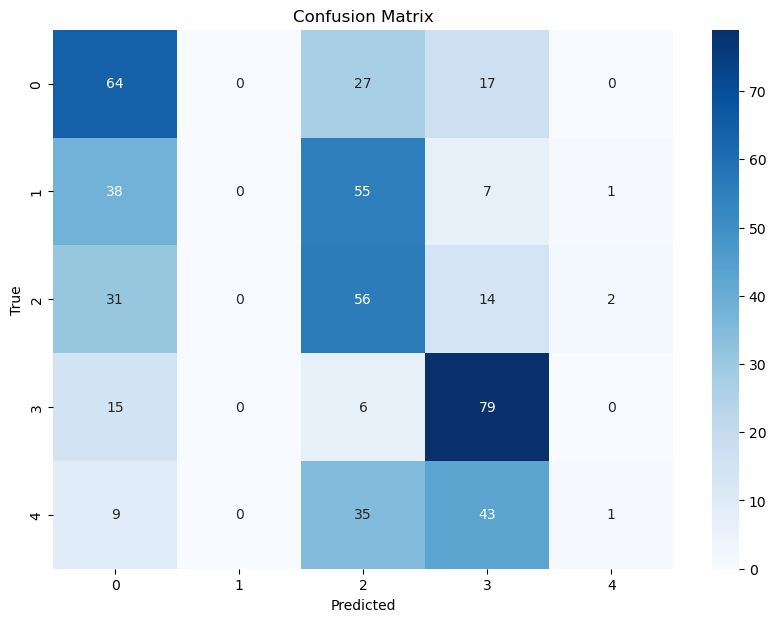

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC dual, kernel=1, MGE)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.30
Acurácia de teste: 0.30


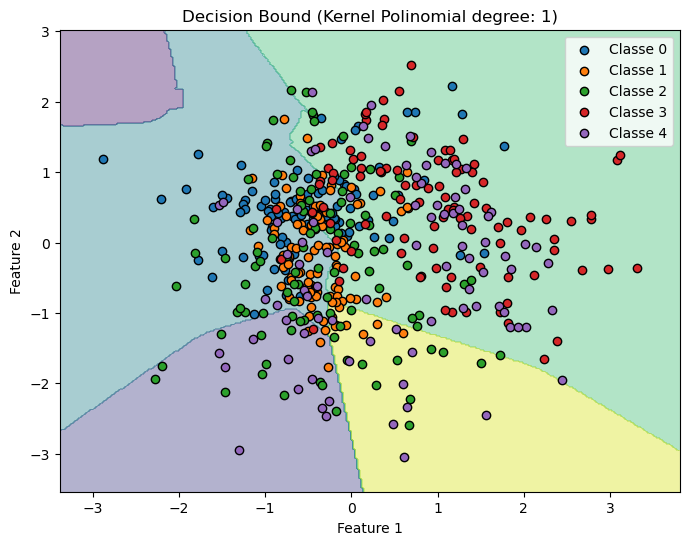

In [20]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=1, kernel=1, step=0.005, mode='dual', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

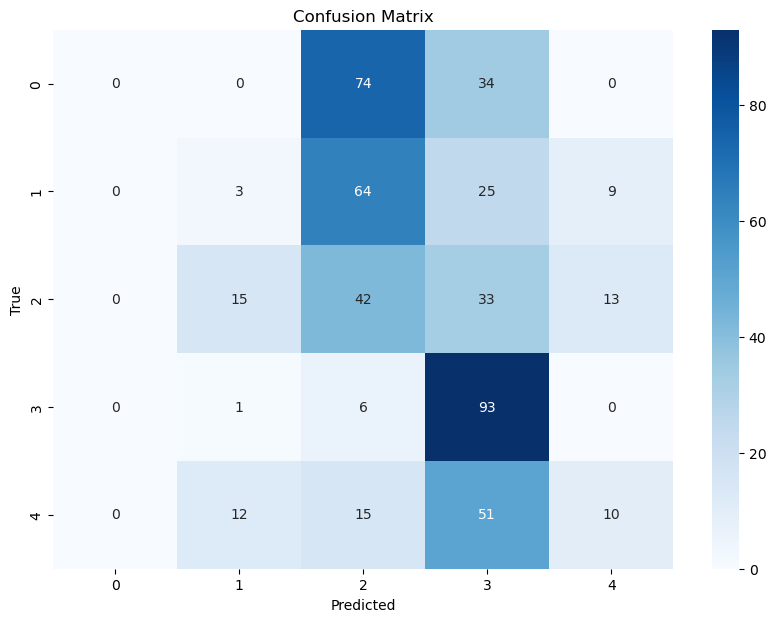

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC dual, kernel=2, MGB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.34
Acurácia de teste: 0.35


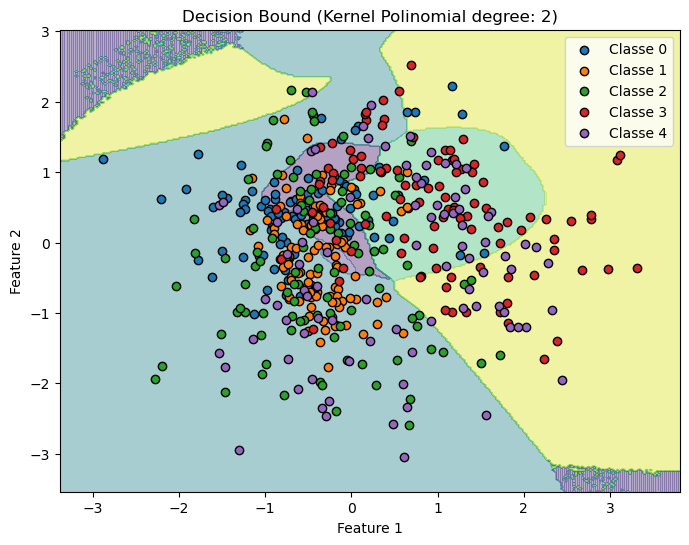

In [22]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=None, kernel=2, step=0.005, mode='dual', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

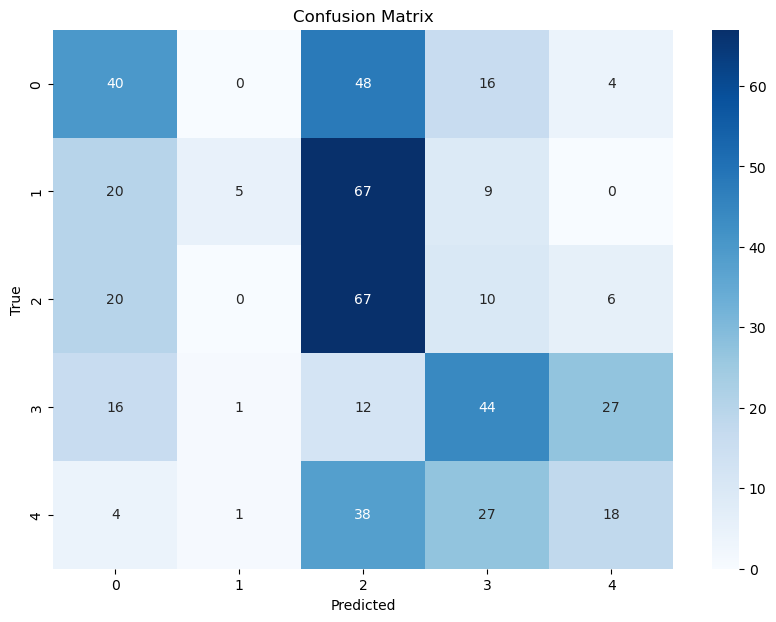

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC dual, kernel=2, MGmB)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...
Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...


c:\Users\veigu\OneDrive\Ambiente de Trabalho\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.28
Acurácia de teste: 0.28


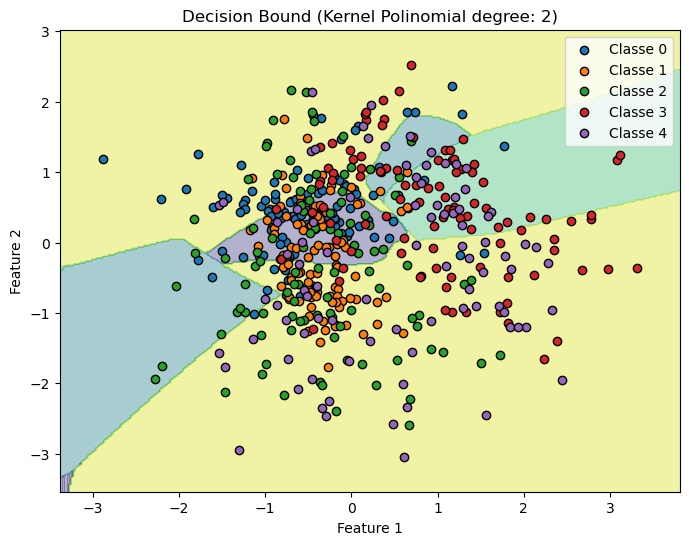

In [24]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=64, kernel=2, step=0.005, mode='dual', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

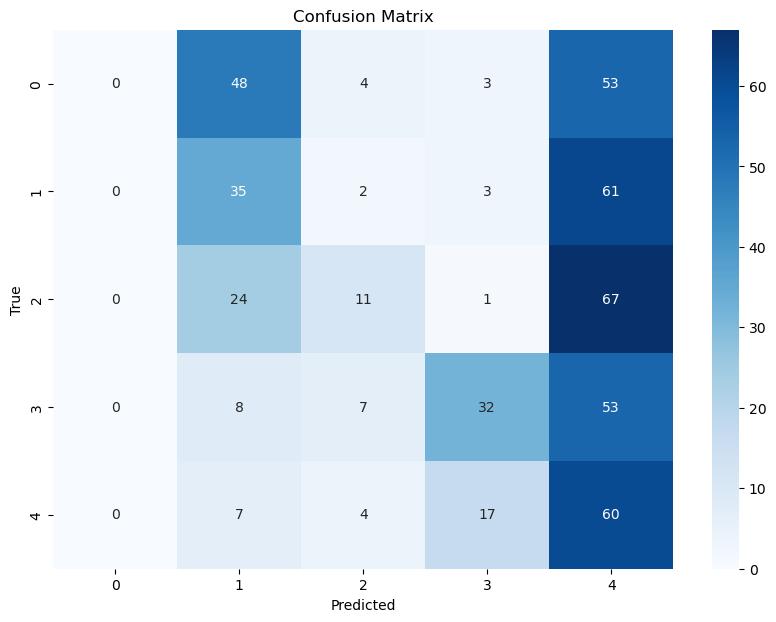

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (ECOC dual, kernel=2, MGE)

Será gerado output codes de tamanho 15 bits para dados com 5 classes diferentes e canônicas.
Gerando modelo para bit #1 do output code...
Gerando modelo para bit #2 do output code...


c:\Users\veigu\OneDrive\Ambiente de Trabalho\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Gerando modelo para bit #3 do output code...
Gerando modelo para bit #4 do output code...
Gerando modelo para bit #5 do output code...
Gerando modelo para bit #6 do output code...
Gerando modelo para bit #7 do output code...
Gerando modelo para bit #8 do output code...
Gerando modelo para bit #9 do output code...
Gerando modelo para bit #10 do output code...
Gerando modelo para bit #11 do output code...
Gerando modelo para bit #12 do output code...
Gerando modelo para bit #13 do output code...
Gerando modelo para bit #14 do output code...
Gerando modelo para bit #15 do output code...
Acurácia de treino: 0.34
Acurácia de teste: 0.36


c:\Users\veigu\OneDrive\Ambiente de Trabalho\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
c:\Users\veigu\OneDrive\Ambiente de Trabalho\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


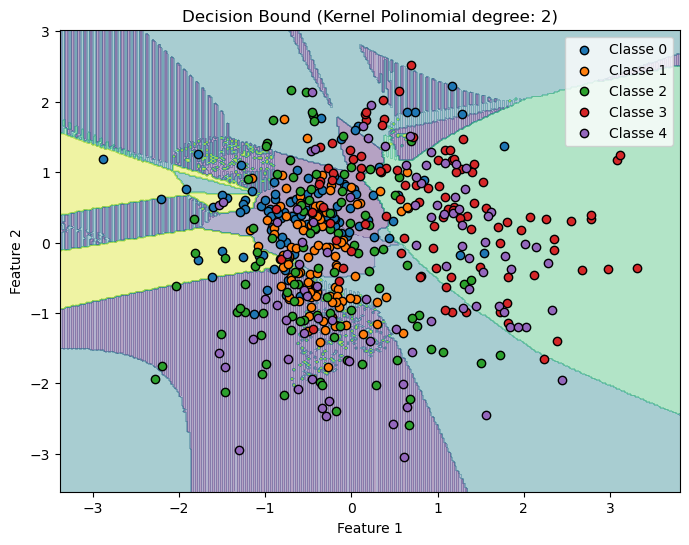

In [59]:
from CLog_MC_Ecoc import CLog_Ecoc
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_Ecoc(n_iter=1000, batch_size=1, kernel=2, step=0.005, mode='dual', iterative=False)

model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

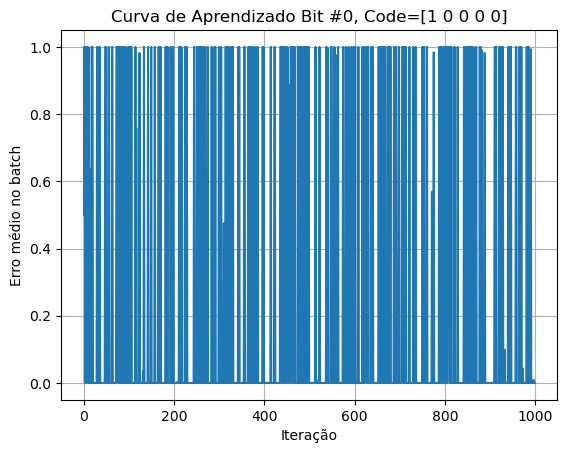

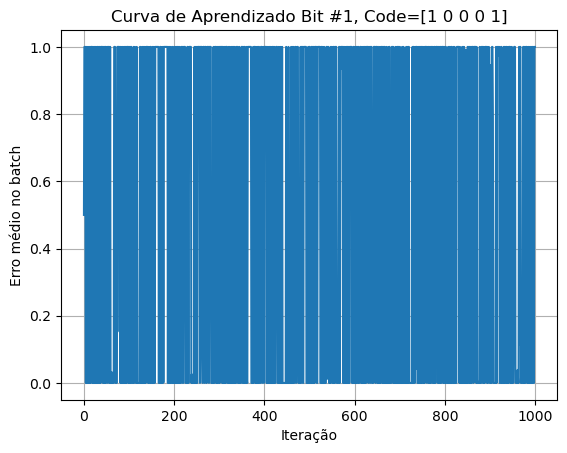

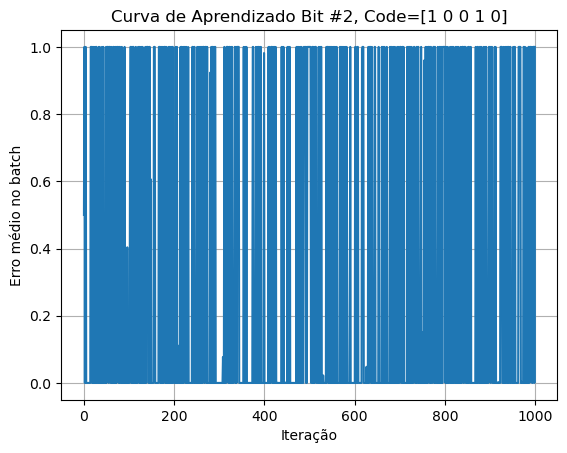

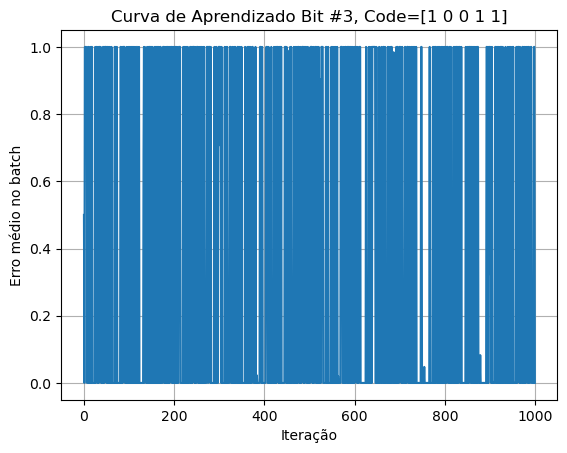

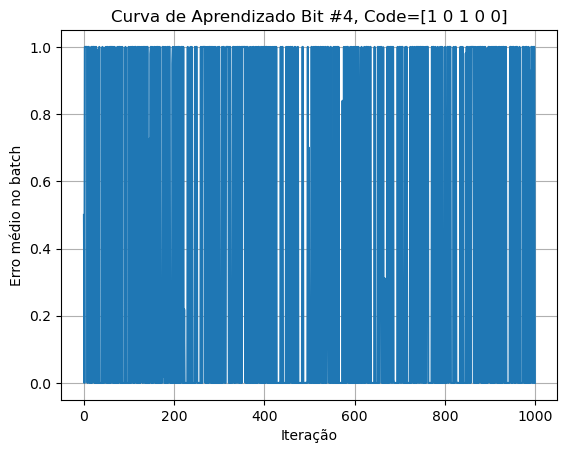

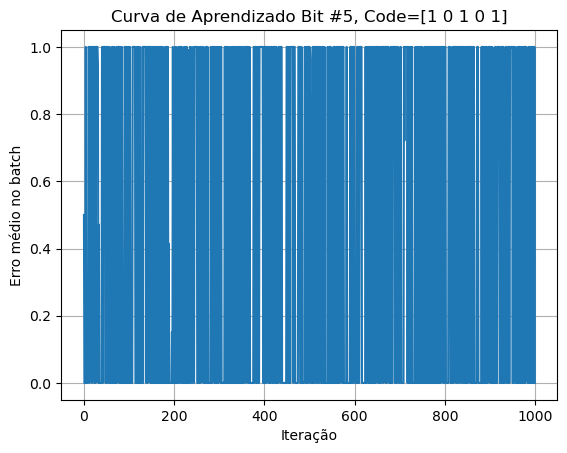

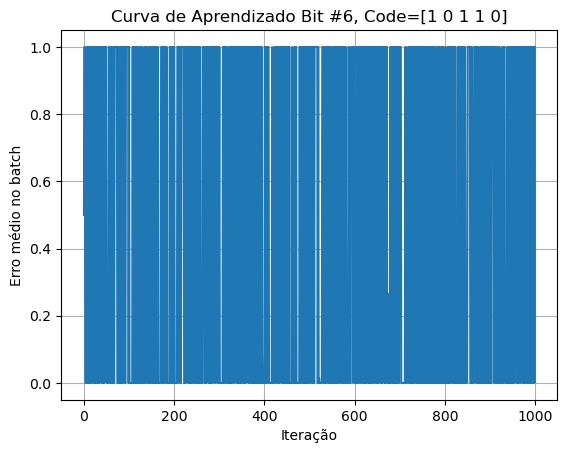

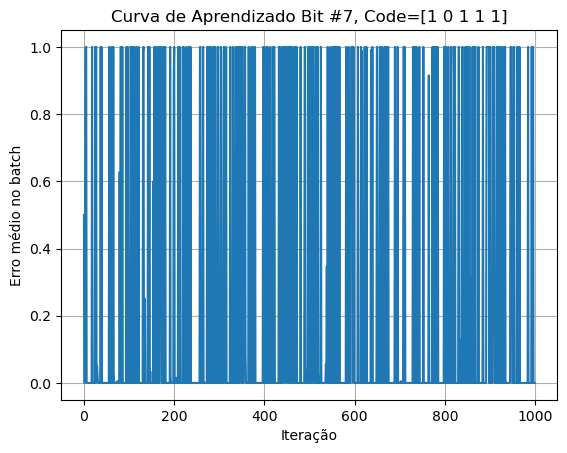

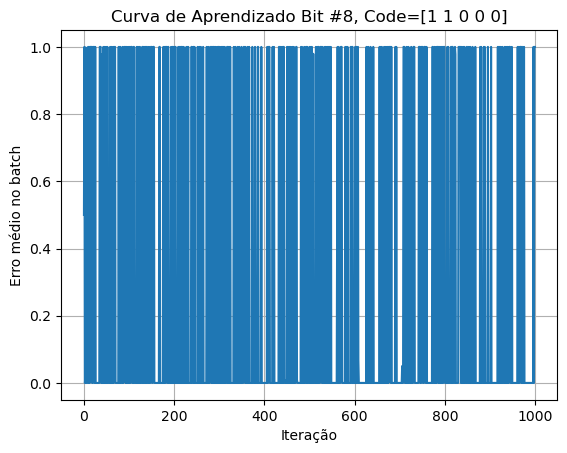

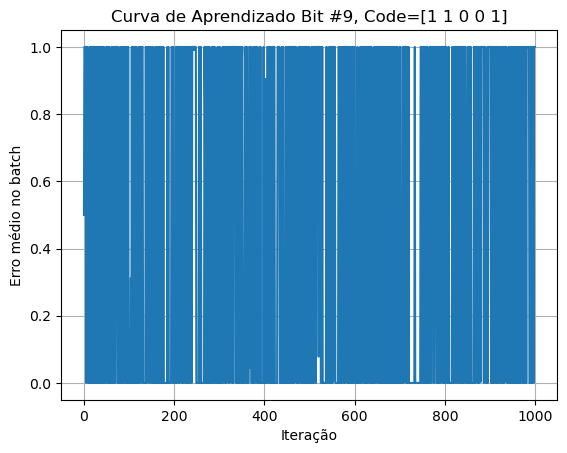

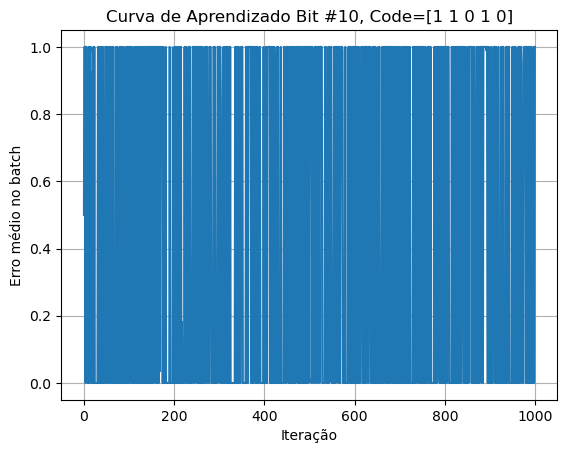

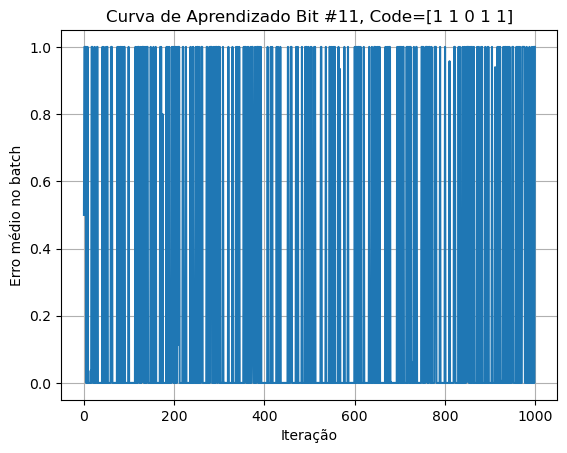

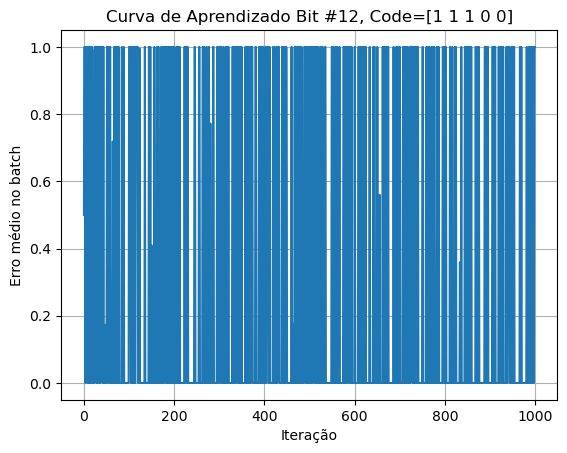

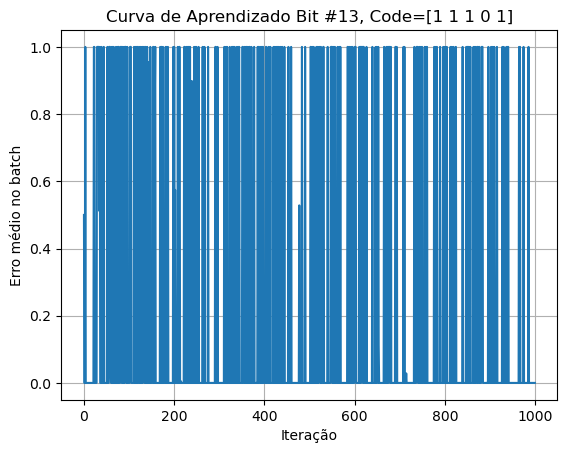

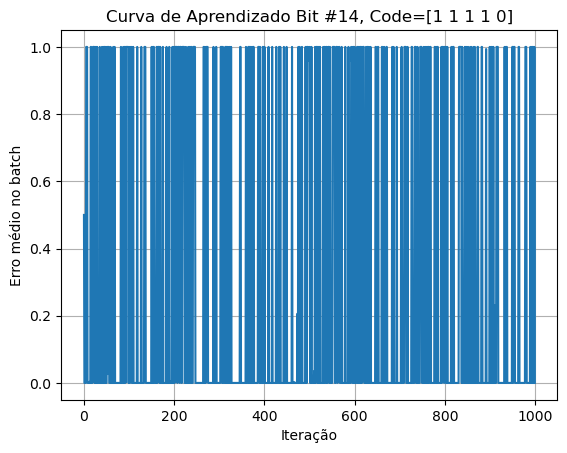

In [ ]:
for i, errors in enumerate(model.get_errors()):
    # Plot da curva de aprendizado
    plt.figure()
    plt.plot(errors)
    plt.title(f"Curva de Aprendizado Bit #{i}, Code={model.codes[:,i]}")
    plt.xlabel("Iteração")
    plt.ylabel("Erro médio no batch")
    plt.grid(True)
    plt.show()

Matriz de confusão

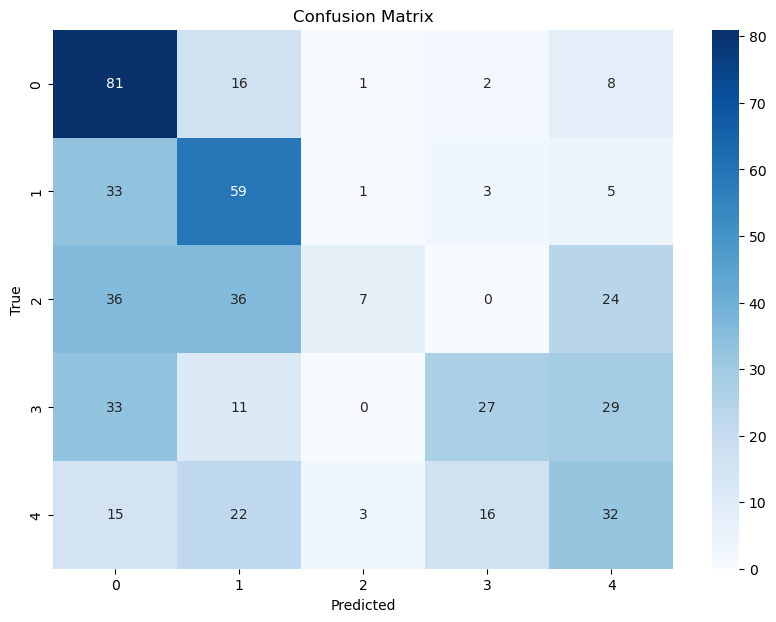

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO primal, kernel=1, MGB) 

Training binary classifiers: 100%|██████████| 10/10 [00:00<00:00, 15.23it/s, Par=3 vs 4]


Acurácia de treino: 0.77
Acurácia de teste: 0.74


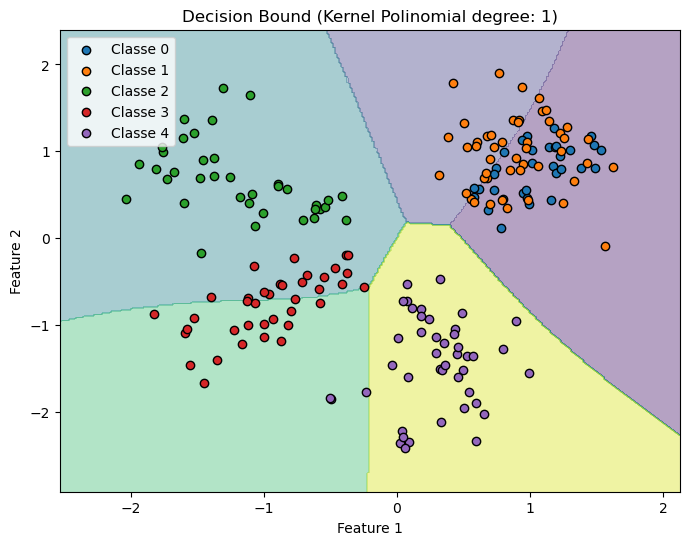

In [33]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=None, iterative=False, mode='primal')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de Confusão

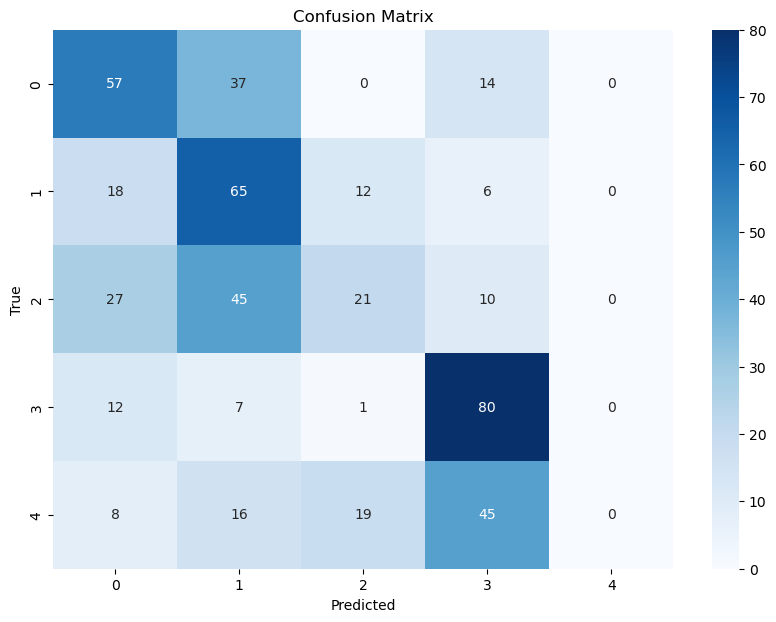

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO primal, kernel=1, MGmB) 

Training binary classifiers: 100%|██████████| 10/10 [00:00<00:00, 16.99it/s, Par=3 vs 4]


Acurácia de treino: 0.73
Acurácia de teste: 0.72


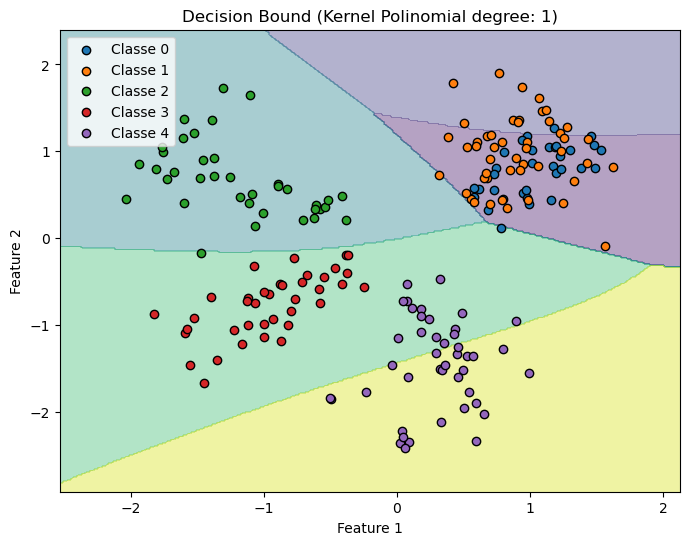

In [34]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=64, iterative=False, mode='primal')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

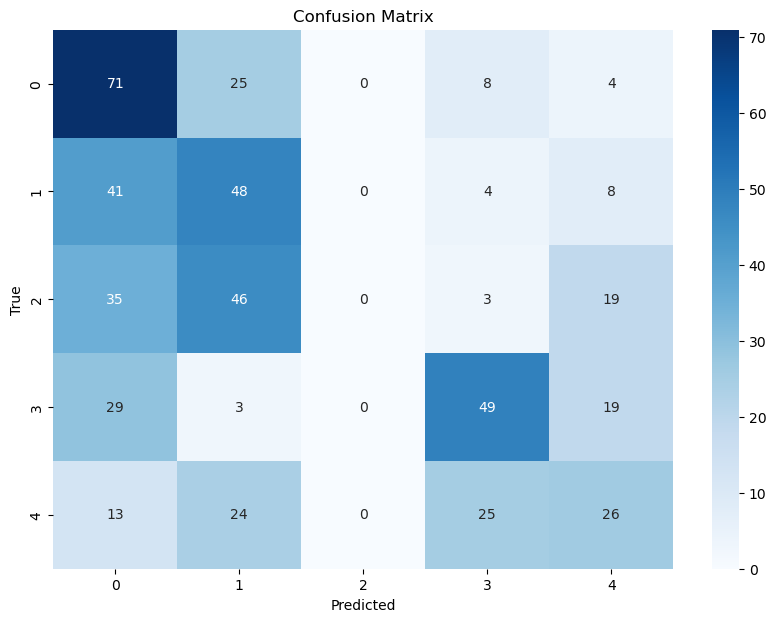

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO primal, kernel=1, MGE) 

Training binary classifiers: 100%|██████████| 10/10 [00:00<00:00, 20.02it/s, Par=3 vs 4]


Acurácia de treino: 0.76
Acurácia de teste: 0.78


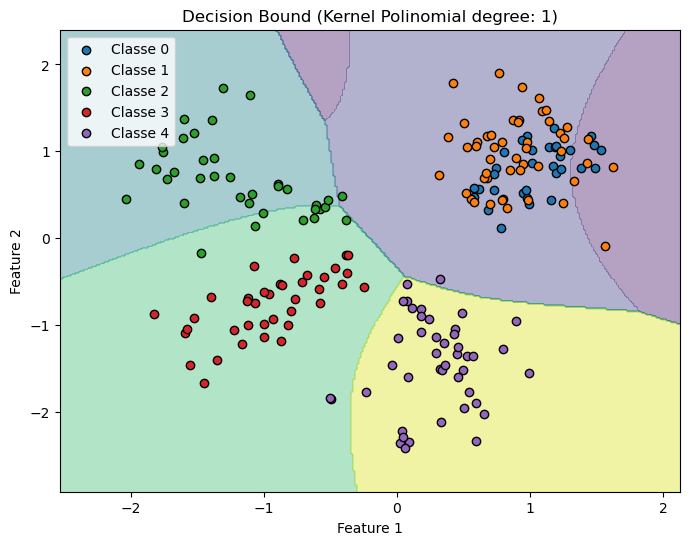

In [35]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=1, iterative=False, mode='primal')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

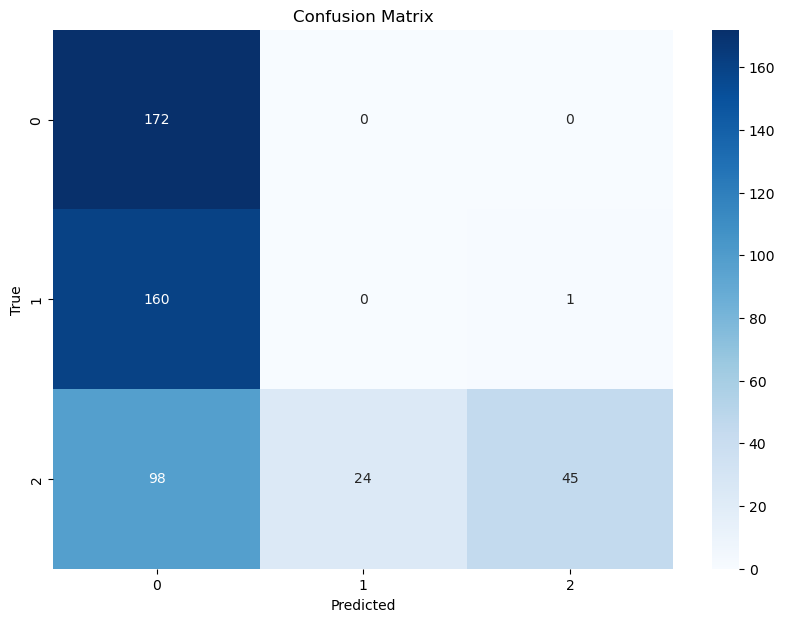

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO primal, kernel=2, MGB) 

Training binary classifiers: 100%|██████████| 10/10 [00:00<00:00, 15.23it/s, Par=3 vs 4]


Acurácia de treino: 0.73
Acurácia de teste: 0.73


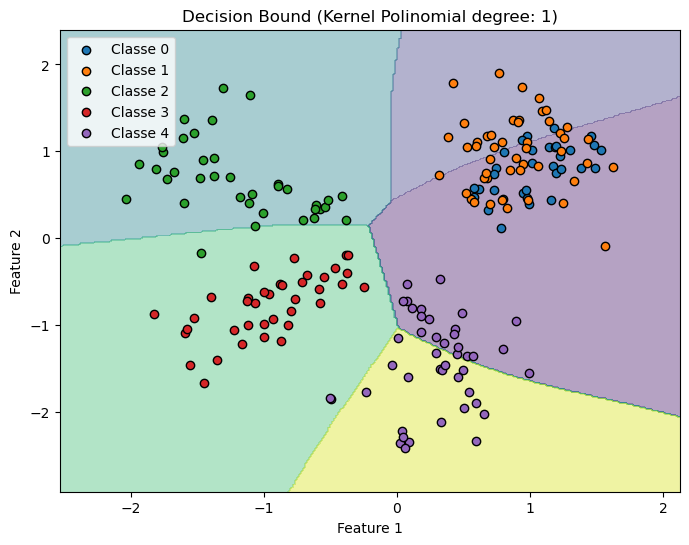

In [36]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=2, step=0.005, n_iter=1000, batch_size=None, iterative=False, mode='primal')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão 

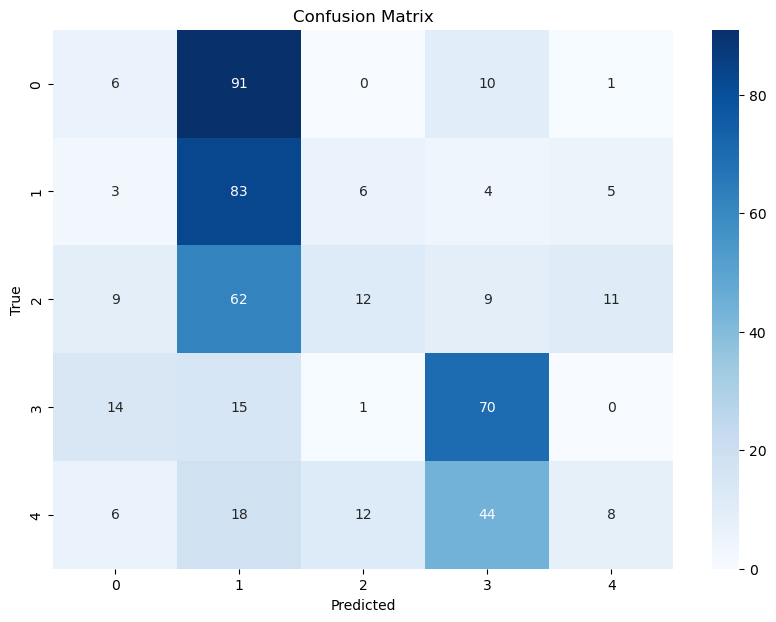

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO primal, kernel=2, MGmB) 

Training binary classifiers: 100%|██████████| 10/10 [00:00<00:00, 16.93it/s, Par=3 vs 4]


Acurácia de treino: 0.84
Acurácia de teste: 0.84


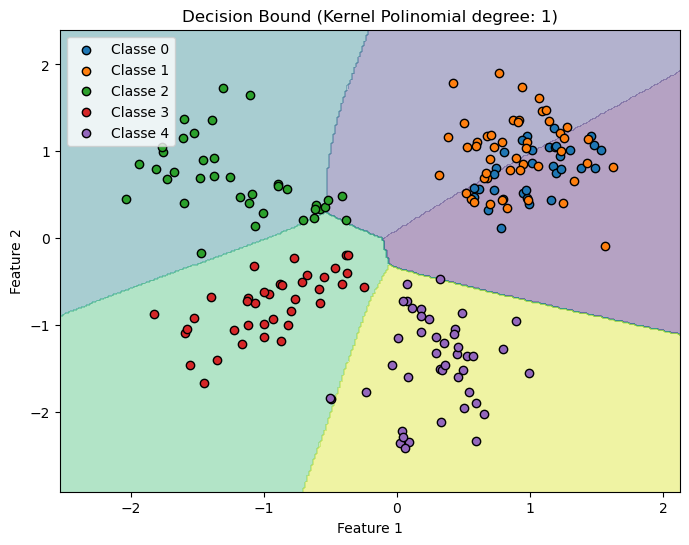

In [37]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=2, step=0.005, n_iter=1000, batch_size=64, iterative=False, mode='primal')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

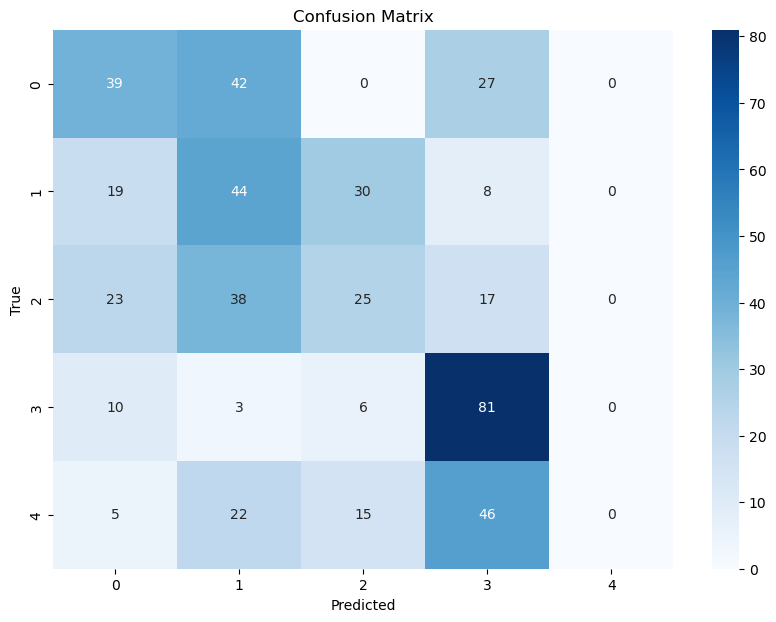

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO primal, kernel=2, MGE) 

Training binary classifiers: 100%|██████████| 10/10 [00:00<00:00, 19.94it/s, Par=3 vs 4]


Acurácia de treino: 0.73
Acurácia de teste: 0.74


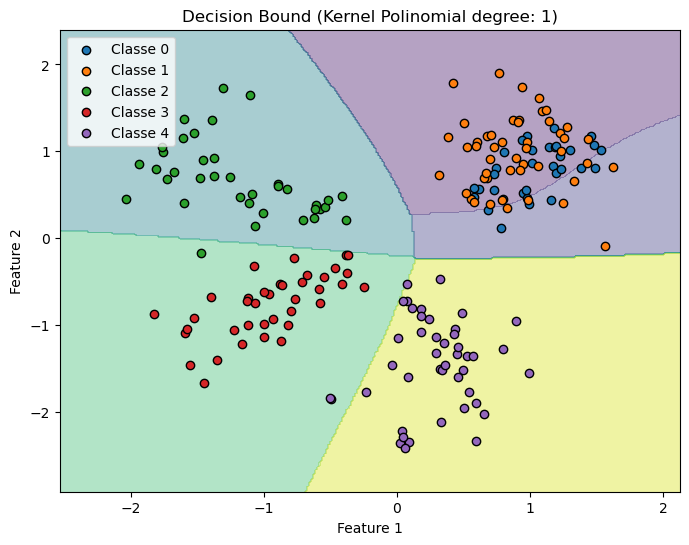

In [38]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=2, step=0.005, n_iter=1000, batch_size=1, iterative=False, mode='primal')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de Confusão

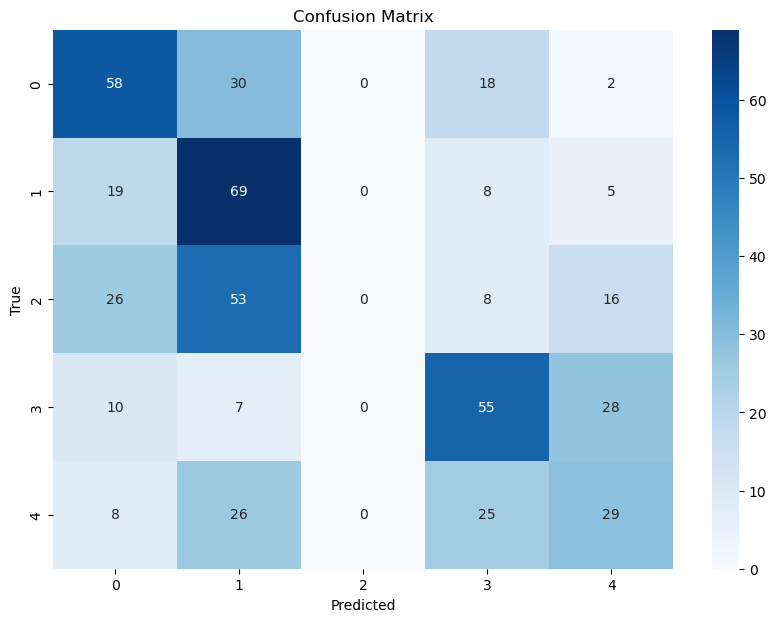

In [39]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO dual, kernel=1, MGB) 

Training binary classifiers: 100%|██████████| 3/3 [00:10<00:00,  3.42s/it, Par=1 vs 2]


Acurácia de treino: 0.24
Acurácia de teste: 0.23


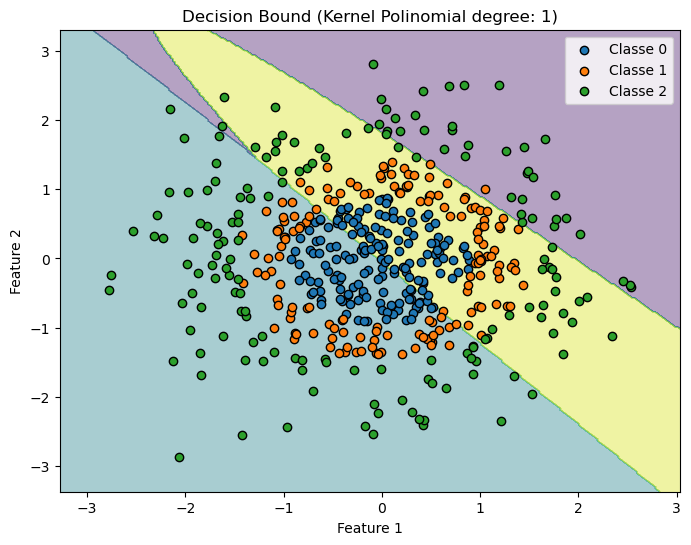

In [14]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=None, iterative=False, mode='dual')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

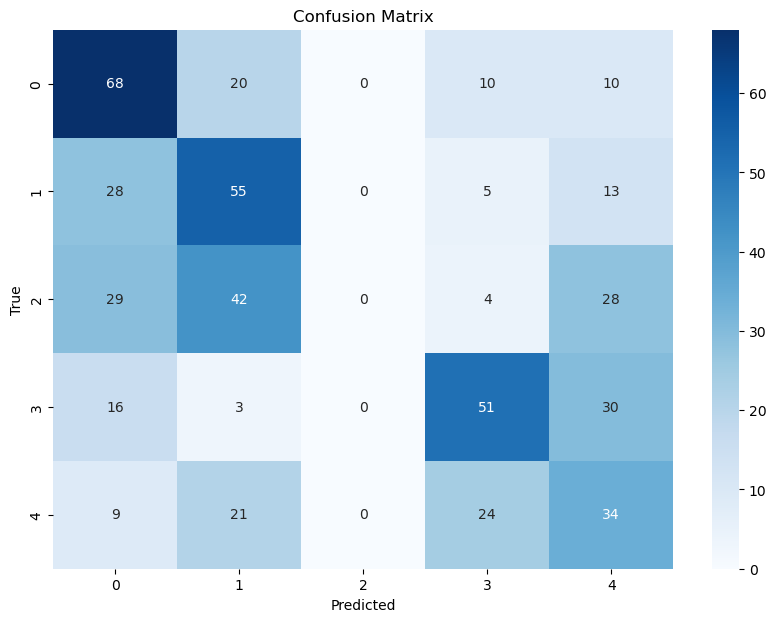

In [45]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO dual, kernel=1, MGmB) 

Training binary classifiers: 100%|██████████| 3/3 [00:00<00:00,  6.09it/s, Par=1 vs 2]


Acurácia de treino: 0.36
Acurácia de teste: 0.37


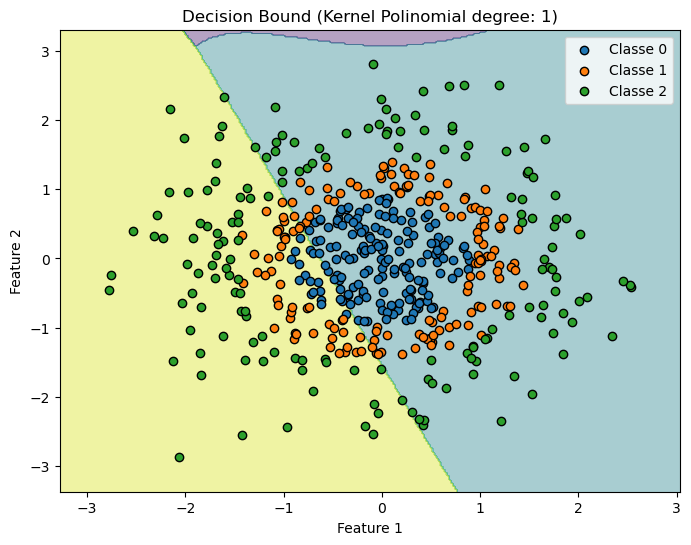

In [15]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=64, iterative=False, mode='dual')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

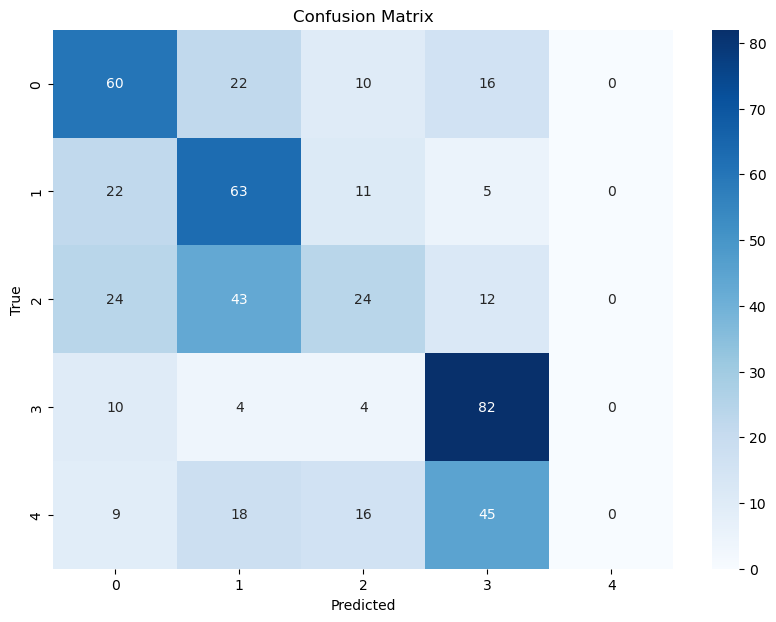

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO dual, kernel=1, MGE) 

Training binary classifiers: 100%|██████████| 3/3 [00:00<00:00, 10.98it/s, Par=1 vs 2]


Acurácia de treino: 0.26
Acurácia de teste: 0.29


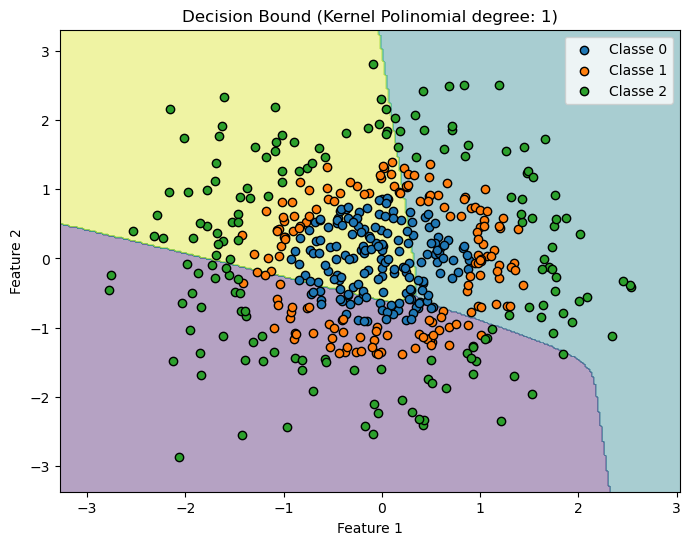

In [16]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=1, step=0.005, n_iter=1000, batch_size=1, iterative=False, mode='dual')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

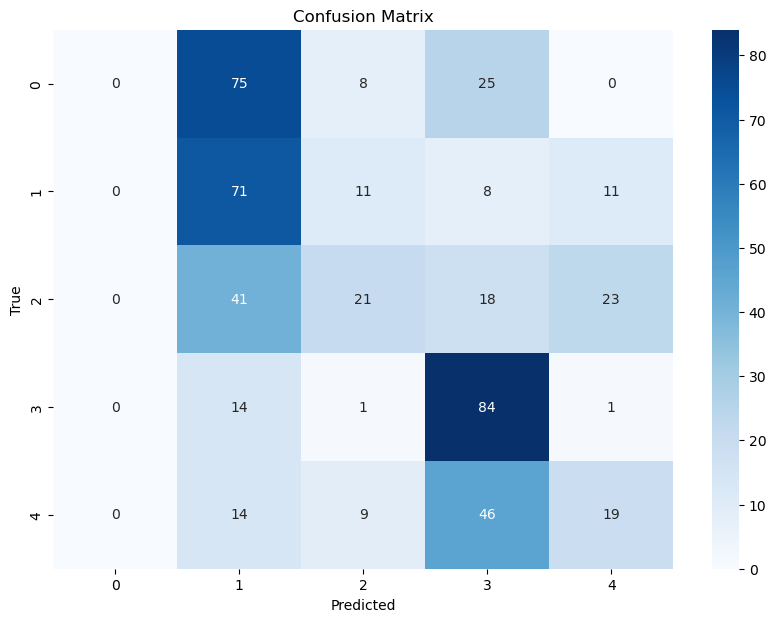

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO dual, kernel=2, MGB) 

Training binary classifiers: 100%|██████████| 3/3 [00:15<00:00,  5.28s/it, Par=1 vs 2]


Acurácia de treino: 0.99
Acurácia de teste: 0.99


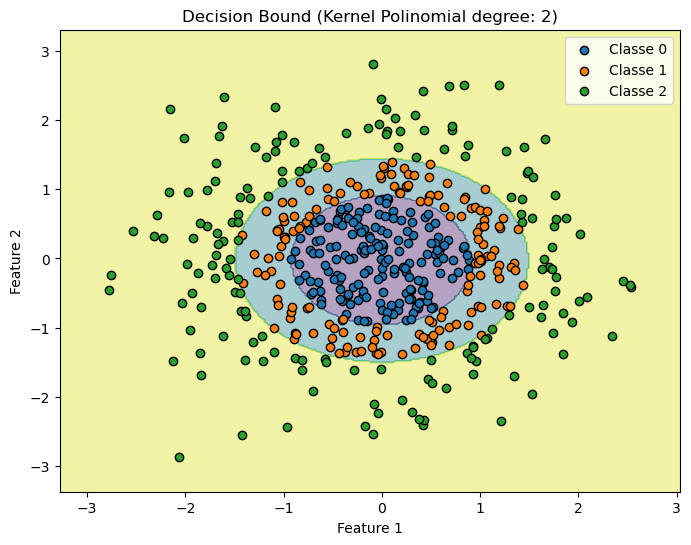

In [17]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=2, step=0.005, n_iter=1000, batch_size=None, iterative=False, mode='dual')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

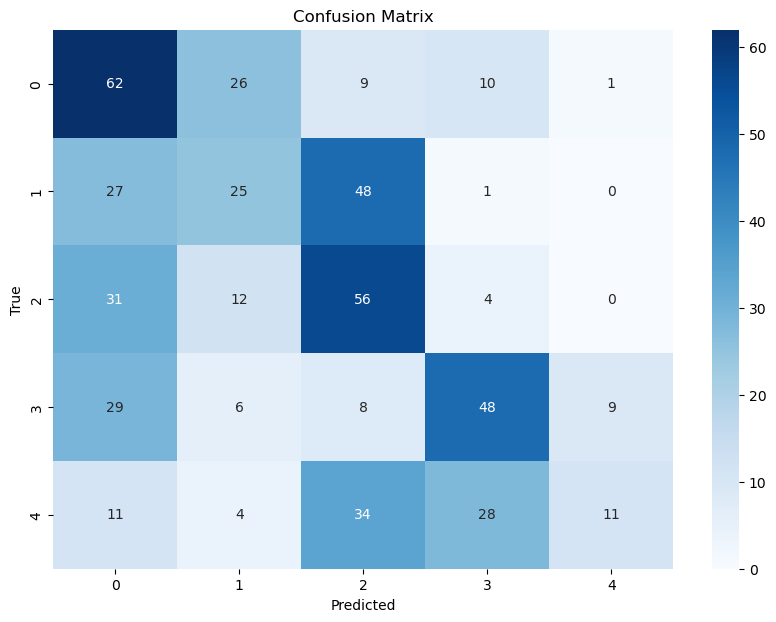

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO dual, kernel=2, MGmB) 

Training binary classifiers: 100%|██████████| 3/3 [00:00<00:00,  5.87it/s, Par=1 vs 2]


Acurácia de treino: 0.98
Acurácia de teste: 0.99


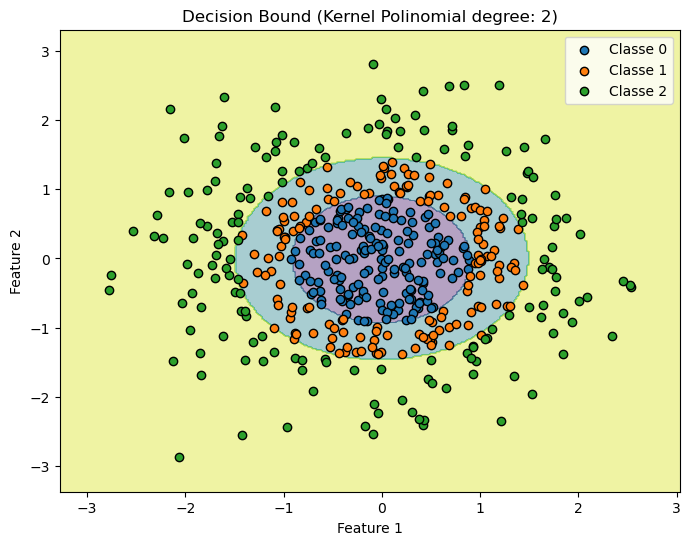

In [18]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary

model = CLog_OVO(kernel=2, step=0.005, n_iter=1000, batch_size=64, iterative=False, mode='dual')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

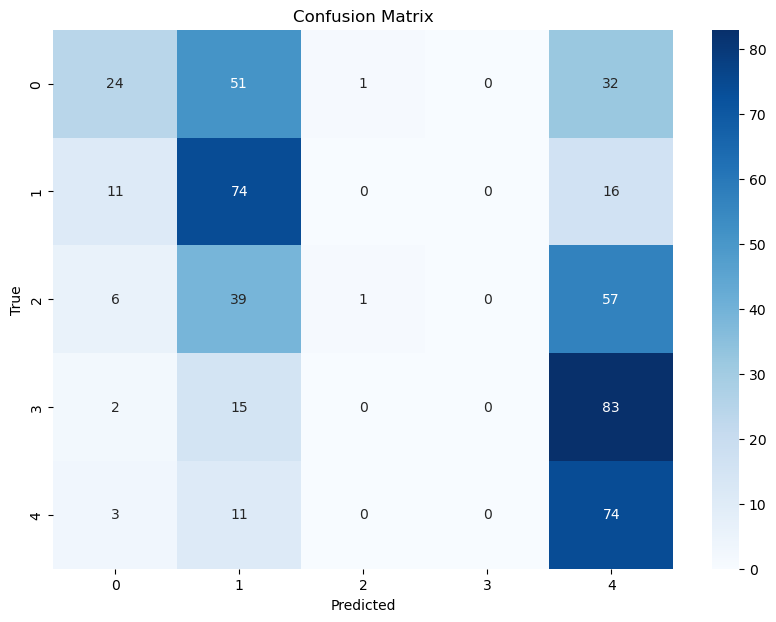

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Chamar classificador (OvO dual, kernel=2, MGE) 

Training binary classifiers:  67%|██████▋   | 2/3 [00:00<00:00, 10.80it/s, Par=0 vs 2]c:\Users\veigu\OneDrive\Ambiente de Trabalho\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
Training binary classifiers: 100%|██████████| 3/3 [00:00<00:00, 10.59it/s, Par=1 vs 2]
c:\Users\veigu\OneDrive\Ambiente de Trabalho\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Acurácia de treino: 0.78
Acurácia de teste: 0.82


c:\Users\veigu\OneDrive\Ambiente de Trabalho\OML\Projeto-OML\CLogDKPd_MGmB.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


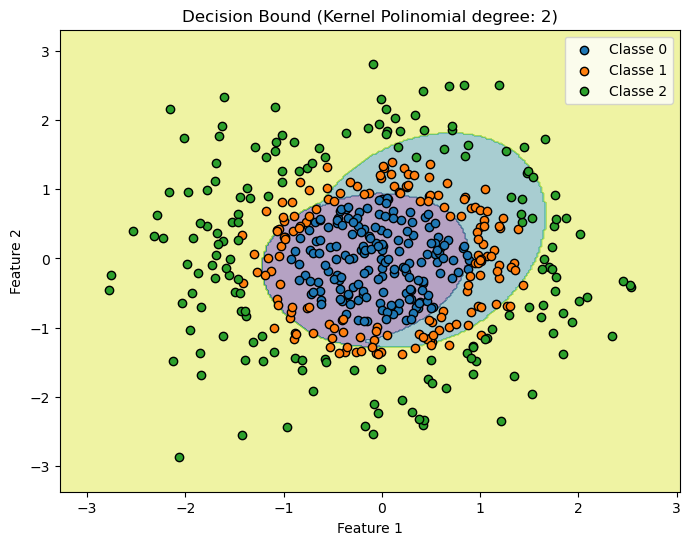

In [19]:
from CLog_MC_OvO import CLog_OVO
from utils import plot_decision_boundary
from sklearn.metrics import accuracy_score

model = CLog_OVO(kernel=2, step=0.005, n_iter=1000, batch_size=1, iterative=False, mode='dual')
model.fit(x_train, y_train)

y_pred = model.predict(x_train)
accuracy = accuracy_score(y_train, y_pred)
print(f'Acurácia de treino: {accuracy:.2f}')

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia de teste: {accuracy:.2f}')
plot_decision_boundary(model, x_test, y_test, resolution=300)

Matriz de confusão

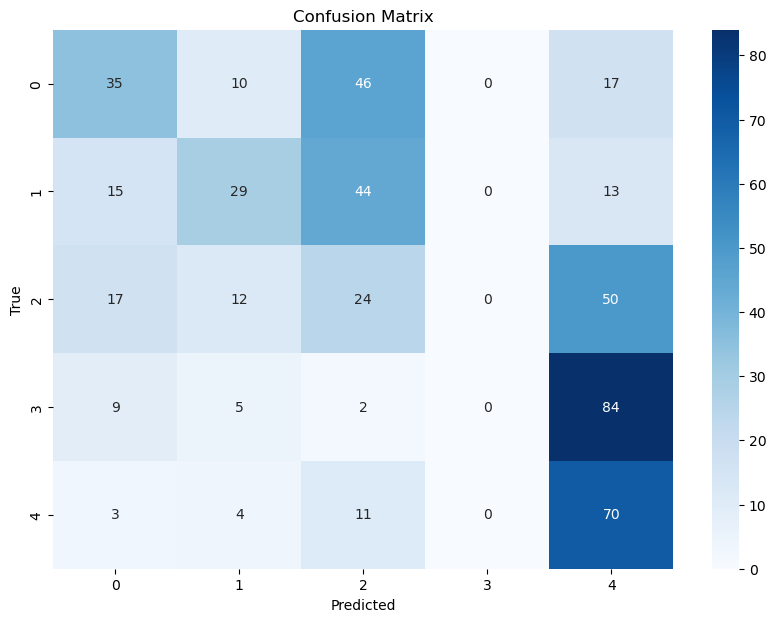

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()